# MNIST

## Reading the data

In [1]:
import numpy as np,tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape, mnist.test.images.shape

((55000, 784), (10000, 784))

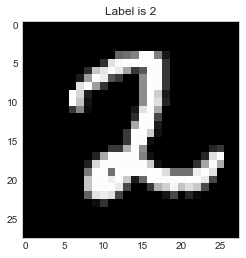

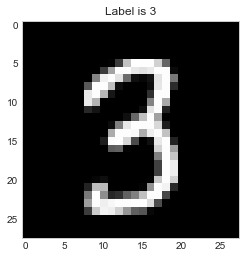

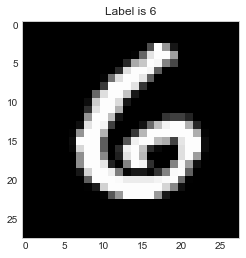

In [4]:
for i in range(2520,2523):
    pixels, label = mnist.train.images[i].reshape(28, 28), np.argmax(mnist.train.labels[i], axis=0)
    plt.title('Label is {label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.grid(False)
    plt.show()

## Logistic regression

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder(tf.float32, [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
tf.gradients(cross_entropy, [W])

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(1001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if i % 50 == 0:
        print("[%d]\ttrain accuracy=%.6f\ttest accuracy=%.6f" % (i,
            sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        ))

## Two-layer network with ReLU

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder(tf.float32, [None, 10])

W_relu = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([200], stddev=0.1))

W = tf.Variable(tf.zeros([200, 10]))
b = tf.Variable(tf.zeros([10]))

h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

logit = tf.matmul(h, W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

y = tf.nn.softmax(logit)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(1001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if i % 50 == 0:
        print("[%d]\ttrain accuracy=%.6f\ttest accuracy=%.6f" % (i,
            sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        ))

## Dropout

In [ ]:
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder(tf.float32, [None, 10])

W_relu = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
b_relu = tf.Variable(tf.truncated_normal([200], stddev=0.1))

W = tf.Variable(tf.zeros([200, 10]))
b = tf.Variable(tf.zeros([10]))

h = tf.nn.relu(tf.matmul(x, W_relu) + b_relu)

keep_probability = tf.placeholder(tf.float32)
h_drop = tf.nn.dropout(h, keep_probability)

logit = tf.matmul(h_drop, W) + b
y = tf.nn.softmax(logit)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [ ]:
for i in range(1001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_probability : 0.5})
    if i % 50 == 0:
        print("[%d]\ttest accuracy=%.6f\ttrain accuracy=%.6f" % (i,
            sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels, keep_probability : 1.0}),
            sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_probability : 1.0})
        ))

# MNIST on Keras

## Preprocessing

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers, regularizers
# tf.python.control_flow_ops = tf

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('/home/snikolenko/Downloads/mnist.npz')
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

batch_size = 100

In [ ]:
X_train.shape

## Logistic regression

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=20,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1),
#                    ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0)
                   ])

In [ ]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.5)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

## One hidden layer

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

## Adding more layers

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(784,), W_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(200, W_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test),
         callbacks=[callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)])

## Dropout

In [ ]:
model = Sequential()
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

## Weight initialization

In [ ]:
model = Sequential()
model.add(Dense(200, init='he_uniform', input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

In [ ]:
model = Sequential()
model.add(Dense(200, init='glorot_uniform', input_shape=(784,)))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=10,
          verbose=1, validation_data=(X_test, Y_test))

## Batch normalization

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(784,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=40,
          verbose=1, validation_data=(X_test, Y_test))